## Install Libraries

### Subtask:
Install all necessary Python libraries such as 'optuna' and 'scikit-learn' to ensure the notebook runs smoothly without dependency issues.


In [ ]:
get_ipython().system('pip install optuna scikit-learn')
print("Libraries optuna and scikit-learn installed successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 6.3 MB/s eta 0:00:00
Libraries optuna and scikit-learn installed successfully.


## Notebook Introduction

### Tuning at Scale: Optimizing Machine Learning for Performance and Efficiency

In the rapidly evolving landscape of machine learning, developing robust and efficient models is paramount. While building a basic model is often straightforward, achieving peak performance requires careful **tuning** of its various components. As models and datasets grow in complexity and size, this tuning process becomes increasingly challenging, leading to the concept of **'Tuning at Scale'**.

**What is 'Tuning at Scale'?**

'Tuning at Scale' refers to the systematic and efficient optimization of machine learning models' hyperparameters and training processes, especially when dealing with large datasets, complex model architectures, or resource-constrained environments. It moves beyond manual trial-and-error, leveraging automated and intelligent techniques to navigate the vast search space of potential configurations.

**Why is it important?**

1.  **Enhanced Model Performance:** Properly tuned hyperparameters can significantly boost a model's accuracy, generalization, and overall effectiveness, leading to more reliable predictions.
2.  **Increased Efficiency:** Automated tuning reduces the time and computational resources spent on manual experimentation, allowing data scientists to focus on more strategic tasks.
3.  **Robustness and Generalization:** Effective tuning helps prevent overfitting and ensures that models perform well on unseen data, making them more reliable in real-world applications.
4.  **Reproducibility:** Documented and automated tuning processes contribute to better experimental reproducibility and clearer understanding of model behavior.

This notebook will guide you through key concepts and practical demonstrations essential for 'Tuning at Scale'. We will cover:

*   **Cross-Validation Techniques:** Understanding how to reliably evaluate model performance and generalize findings.
*   **Hyperparameter Tuning with Optuna:** Introducing an efficient and flexible framework for automated hyperparameter optimization.
*   **Early Stopping:** Learning a crucial technique to prevent overfitting and optimize training time.

By the end of this notebook, you will have a solid understanding of these methods and be equipped to apply them to build high-performing and efficient machine learning models.

## Load Dataset

### Subtask:
Select and load an appropriate in-built regression dataset from `scikit-learn` (e.g., California Housing, Boston Housing, Diabetes) suitable for demonstrating regression concepts


In [ ]:
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()

# Separate features (X) and target (y)
X = diabetes.data
y = diabetes.target

# Print the description of the dataset
print("Dataset Description:")
print(diabetes.DESCR)

# Display the shapes of X and y
print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Dataset Description:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 featu

## Cross-Validation Techniques

Cross-validation is a powerful statistical technique used to evaluate the generalization ability of a machine learning model. When building models, it's crucial to assess how well they will perform on unseen data, rather than just how well they perform on the data they were trained on.

### Why is Cross-Validation Important?

1.  **Robust Model Evaluation:** It provides a more reliable estimate of a model's performance by training and testing the model on different subsets of the data multiple times, reducing the bias that can result from a single train-test split.
2.  **Generalization:** It helps ensure that the model generalizes well to new, unseen data, which is the ultimate goal of machine learning.
3.  **Hyperparameter Tuning:** It's essential for hyperparameter tuning, allowing us to select the best set of hyperparameters that lead to optimal model performance without overfitting to the training data.
4.  **Preventing Overfitting:** By evaluating the model on multiple test sets, cross-validation helps detect and mitigate overfitting, where a model performs well on training data but poorly on new data.

In the following sections, we will explore different types of cross-validation techniques with practical examples.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, LeaveOneOut, RepeatedKFold, cross_val_score
import numpy as np

print("Necessary scikit-learn modules for cross-validation imported successfully.")

Necessary scikit-learn modules for cross-validation imported successfully.


### K-Fold Cross-Validation

K-Fold Cross-Validation is one of the most common and widely used cross-validation techniques. In this method, the dataset is divided into `k` equally sized folds (or subsets). The model is then trained `k` times. In each iteration, one fold is used as the test set (validation set), and the remaining `k-1` folds are used as the training set. This process ensures that every data point gets to be in the test set exactly once, and is used in the training set `k-1` times.

**Advantages:**
*   Reduces bias compared to a single train-test split, as all data points are eventually used for both training and testing.
*   Provides a more robust estimate of model performance.

**Disadvantages:**
*   Can be computationally expensive for very large datasets or complex models, as the model needs to be trained `k` times.

| Iteration | Train On | Test On (left out) | Score   |
| --------- | -------- | ------------------ | ------- |
| 1         | B+C+D+E  | A                  | score_1 |
| 2         | A+C+D+E  | B                  | score_2 |
| 3         | A+B+D+E  | C                  | score_3 |
| 4         | A+B+C+E  | D                  | score_4 |
| 5         | A+B+C+D  | E                  | score_5 |


In [ ]:
print("\n--- K-Fold Cross-Validation ---")

# 4a. Instantiate KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4b. Instantiate a LinearRegression model
model = LinearRegression()

# 4c. Use cross_val_score with KFold
kfold_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE for better interpretability
kfold_rmse_scores = np.sqrt(-kfold_scores)

# 4d. Print the individual scores and their mean and standard deviation
print(f"Individual K-Fold RMSE scores: {kfold_rmse_scores}")
print(f"Mean K-Fold RMSE: {np.mean(kfold_rmse_scores):.2f}")
print(f"Standard Deviation of K-Fold RMSE: {np.std(kfold_rmse_scores):.2f}")
print("A lower RMSE indicates better model performance.")


--- K-Fold Cross-Validation ---
Individual K-Fold RMSE scores: [53.85344584 51.60075202 57.55263581 52.89502389 58.34284697]
Mean K-Fold RMSE: 54.85
Standard Deviation of K-Fold RMSE: 2.64
A lower RMSE indicates better model performance.


### Leave-One-Out Cross-Validation (LOOCV)
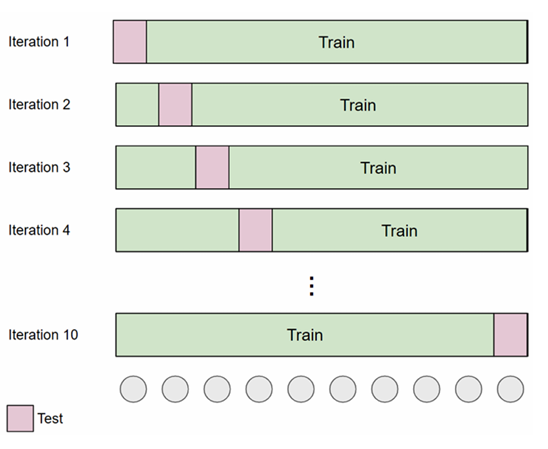

Leave-One-Out Cross-Validation (LOOCV) is a special case of K-Fold Cross-Validation where the number of folds `k` is equal to the number of data points `n` in the dataset. In each iteration, one single data point is used as the test set, and the remaining `n-1` data points are used as the training set. This process is repeated `n` times, once for each data point.

**Advantages:**
*   Provides an almost unbiased estimate of the test error because each data point is used exactly once as a test set.
*   Maximizes the use of data for training in each fold, as `n-1` samples are used for training.

**Disadvantages:**
*   **Extremely computationally expensive** for large datasets, as the model needs to be trained `n` times. For datasets with thousands or millions of samples, this becomes infeasible.
*   Can have high variance in the estimated performance compared to K-Fold, especially if the data points are very similar, as the training sets are highly correlated.
*   Often not preferred over K-Fold Cross-Validation unless the dataset is very small.

In [ ]:
print('\n--- Leave-One-Out Cross-Validation ---')

# 6a. Instantiate LeaveOneOut
loo = LeaveOneOut()

# 6b. Instantiate a LinearRegression model
model_loo = LinearRegression()

# 6c. Use cross_val_score with LeaveOneOut
# Note: LOOCV can be very slow for larger datasets. For demonstration purposes, we run it.
loo_scores = cross_val_score(model_loo, X, y, cv=loo, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
loo_rmse_scores = np.sqrt(-loo_scores)

# 6d. Print the mean and standard deviation of the scores
print(f"Mean LOOCV RMSE: {np.mean(loo_rmse_scores):.2f}")
print(f"Standard Deviation of LOOCV RMSE: {np.std(loo_rmse_scores):.2f}")
print("A lower RMSE indicates better model performance. Note the computational cost for larger datasets.")


--- Leave-One-Out Cross-Validation ---
Mean LOOCV RMSE: 44.36
Standard Deviation of LOOCV RMSE: 32.16
A lower RMSE indicates better model performance. Note the computational cost for larger datasets.


### Repeated K-Fold Cross-Validation
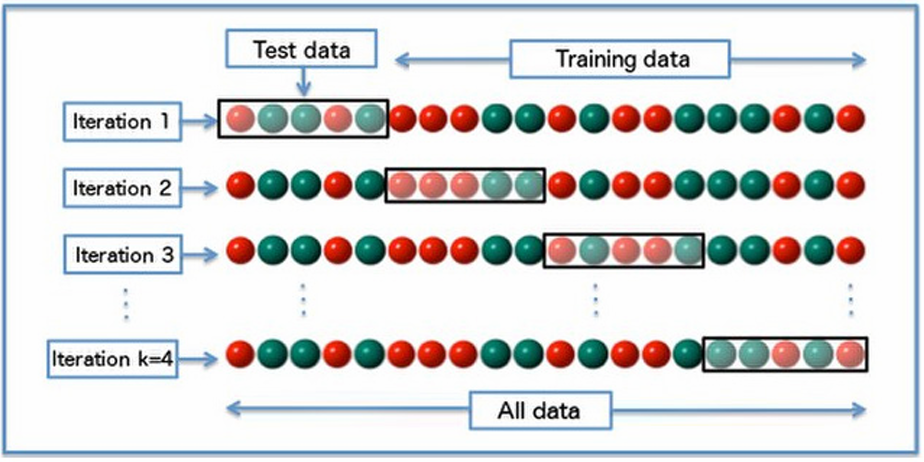


Repeated K-Fold Cross-Validation is an extension of the standard K-Fold method. Instead of performing K-Fold cross-validation once, the process is repeated multiple times, and the results are averaged. For example, if you set `n_repeats=3` and `n_splits=5`, the model will undergo 5-fold cross-validation three separate times. Each repeat uses a different randomization for splitting the data into folds.

**Why use Repeated K-Fold?**

1.  **Reduces Variance:** By repeating the K-Fold process with different random splits, it helps to reduce the variability of the performance estimate. A single K-Fold run might by chance have a "lucky" or "unlucky" split, leading to an overly optimistic or pessimistic performance estimate.
2.  **More Robust Evaluation:** Averaging the results across multiple repeats provides a more stable and reliable measure of the model's true performance on unseen data.
3.  **Better for Hyperparameter Tuning:** When comparing different models or hyperparameter settings, Repeated K-Fold provides a more confident assessment of which configuration truly performs better.

It is generally recommended for more thorough model evaluation, especially when the dataset size is moderate and a stable performance estimate is crucial.

In [ ]:
print('\n--- Repeated K-Fold Cross-Validation ---')

# 8a. Instantiate RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# 8b. Instantiate a LinearRegression model
model_rkf = LinearRegression()

# 8c. Use cross_val_score with RepeatedKFold
rkf_scores = cross_val_score(model_rkf, X, y, cv=rkf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rkf_rmse_scores = np.sqrt(-rkf_scores)

# 8d. Print the mean and standard deviation of the scores
print(f"Mean Repeated K-Fold RMSE: {np.mean(rkf_rmse_scores):.2f}")
print(f"Standard Deviation of Repeated K-Fold RMSE: {np.std(rkf_rmse_scores):.2f}")
print("A lower RMSE indicates better model performance and a more stable estimate.")


--- Repeated K-Fold Cross-Validation ---
Mean Repeated K-Fold RMSE: 54.96
Standard Deviation of Repeated K-Fold RMSE: 2.97
A lower RMSE indicates better model performance and a more stable estimate.


### Quiz: Cross-Validation Techniques

To test your understanding of cross-validation techniques, answer the following multiple-choice questions.

#### Question 1
Which cross-validation technique is generally considered the most computationally expensive for large datasets?

a) K-Fold Cross-Validation
b) Leave-One-Out Cross-Validation (LOOCV)
c) Repeated K-Fold Cross-Validation
d) Simple Train-Test Split

<details><summary>Click for Answer</summary>
<p>The correct answer is **b) Leave-One-Out Cross-Validation (LOOCV)**. It trains the model `n` times, where `n` is the number of samples, making it extremely slow for large datasets.</p>
</details>

#### Question 2
What is the primary advantage of using Repeated K-Fold Cross-Validation over standard K-Fold Cross-Validation?

a) It is less computationally expensive.
b) It provides an unbiased estimate of the test error in all cases.
c) It reduces the variability of the performance estimate by averaging results over multiple random splits.
d) It guarantees perfect generalization to unseen data.

<details><summary>Click for Answer</summary>
<p>The correct answer is **c) It reduces the variability of the performance estimate by averaging results over multiple random splits.** This leads to a more stable and reliable performance measure.</p>
</details>

#### Question 3
In K-Fold Cross-Validation with `n_splits = 5`, how many times is the model trained and evaluated?

a) 1 time
b) 2 times
c) 5 times
d) 10 times

<details><summary>Click for Answer</summary>
<p>The correct answer is **c) 5 times**. The model is trained and evaluated once for each of the `k` folds, where one fold acts as the test set and the remaining `k-1` folds form the training set.</p>
</details>

## Hyperparameter Tuning with Optuna

### What is Hyperparameter Tuning?

Machine learning models have two types of parameters:

1.  **Model Parameters:** These are learned during training from the data (e.g., weights in a neural network, coefficients in a linear regression model).
2.  **Hyperparameters:** These are external configurations that cannot be learned directly from the data and must be set prior to the training process. Examples include the learning rate in gradient descent, the number of trees in a Random Forest, the regularization strength in a Ridge regression, or the number of clusters in K-Means.

**Hyperparameter tuning** is the process of finding the optimal set of hyperparameters for a machine learning model that yields the best performance on a given task. Poorly chosen hyperparameters can lead to models that either underfit (too simple, can't capture patterns) or overfit (too complex, memorizes noise in training data).

### Why automate Hyperparameter Tuning?

Manually searching for the best hyperparameters is often impractical due to:

*   **Vast Search Space:** The combination of hyperparameters can be enormous, making exhaustive search computationally expensive or impossible.
*   **Time-Consuming:** Manual trial-and-error is inefficient and requires significant human effort.
*   **Suboptimal Results:** Human intuition alone might not find the truly optimal configuration.

### Introducing Optuna

**Optuna** is an open-source hyperparameter optimization framework that automates the search for optimal hyperparameter values. It is designed for machine learning and offers several advantages:

*   **Define-by-Run API:** Users can construct their objective function dynamically, allowing for flexible search space definitions.
*   **State-of-the-Art Samplers:** Optuna includes various intelligent sampling algorithms (e.g., Tree-structured Parzen Estimator (TPE), CMA-ES) that efficiently explore the hyperparameter space.
*   **Pruners:** It can automatically stop unpromising trials during training, saving computational resources and time.
*   **Scalability:** Designed to scale to complex optimization tasks.

In the following section, we will demonstrate how to use Optuna to tune a regression model's hyperparameters.

In [ ]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold, cross_val_score
import numpy as np # Already imported, but good to ensure it's available

print("Optuna, Ridge, RepeatedKFold, and cross_val_score imported successfully.")

Optuna, Ridge, RepeatedKFold, and cross_val_score imported successfully.


In [ ]:
def objective(trial):
    # 3a. Suggest hyperparameters for a Ridge model
    alpha = trial.suggest_float('alpha', 0.1, 10.0, log=True)

    # 3b. Instantiate a Ridge model with the suggested alpha
    model = Ridge(alpha=alpha)

    # 3c. Use RepeatedKFold for cross-validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

    # 3d. Calculate the cross-validation score (neg_mean_squared_error)
    # Optuna aims to minimize the objective function, so we return negative MSE.
    scores = cross_val_score(model, X, y, cv=rkf, scoring='neg_mean_squared_error')

    # 3e. Return the negative mean of the scores
    return np.mean(scores)

print("Objective function for Optuna defined successfully.")

Objective function for Optuna defined successfully.


In [ ]:
print('\n--- Optuna Hyperparameter Tuning ---')

# 4. Create an Optuna study
# We use 'maximize' because our objective function returns negative MSE,
# so maximizing this value means minimizing the actual MSE (and thus RMSE).
study = optuna.create_study(direction='maximize')

print("Optuna study created successfully with direction 'maximize'.")

[I 2025-11-19 05:26:27,801] A new study created in memory with name: no-name-829e8a26-a6c7-453a-a20b-7590fc618aab



--- Optuna Hyperparameter Tuning ---
Optuna study created successfully with direction 'maximize'.


In [ ]:
import numpy as np # Ensure numpy is available for sqrt if not already imported in this scope

# 5. Optimize the study
# We'll run 100 trials to search for the best hyperparameters.
study.optimize(objective, n_trials=100)

# 6. Print the best trial's value and best hyperparameters
print("\nNumber of finished trials: ", len(study.trials))
print("Best trial:")

trial = study.best_trial

# Convert the best value (negative MSE) to RMSE for interpretability
best_rmse = np.sqrt(-trial.value)

print(f"  Value (RMSE): {best_rmse:.2f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2025-11-19 05:26:27,906] Trial 0 finished with value: -3773.015389877257 and parameters: {'alpha': 1.8739319001612795}. Best is trial 0 with value: -3773.015389877257.
[I 2025-11-19 05:26:27,964] Trial 1 finished with value: -3469.2041708580364 and parameters: {'alpha': 1.1000699944138457}. Best is trial 1 with value: -3469.2041708580364.
[I 2025-11-19 05:26:28,009] Trial 2 finished with value: -4879.715544133661 and parameters: {'alpha': 8.393429489820031}. Best is trial 1 with value: -3469.2041708580364.
[I 2025-11-19 05:26:28,046] Trial 3 finished with value: -3424.5208467102516 and parameters: {'alpha': 1.0011653828141267}. Best is trial 3 with value: -3424.5208467102516.
[I 2025-11-19 05:26:28,091] Trial 4 finished with value: -3555.6463826391105 and parameters: {'alpha': 1.3008672333573132}. Best is trial 3 with value: -3424.5208467102516.
[I 2025-11-19 05:26:28,128] Trial 5 finished with value: -4643.347245682161 and parameters: {'alpha': 6.078665064878665}. Best is trial 3 w


Number of finished trials:  100
Best trial:
  Value (RMSE): 54.98
  Params: 
    alpha: 0.10012311468880192


### Quiz: Optuna and Hyperparameter Tuning

To solidify your understanding of hyperparameter tuning and Optuna, answer the following multiple-choice questions.

#### Question 1
What is the primary purpose of hyperparameter tuning in machine learning?

a) To learn the weights and biases of a model during training.
b) To find the optimal set of external configurations for a model to achieve the best performance.
c) To preprocess the data before feeding it to the model.
d) To evaluate the model's performance on unseen data.

<details><summary>Click for Answer</summary>
<p>The correct answer is **b) To find the optimal set of external configurations for a model to achieve the best performance.** Hyperparameters are set before training and greatly influence a model's effectiveness.</p>
</details>

#### Question 2
Which of the following is a key benefit of using an automated hyperparameter optimization framework like Optuna?

a) It guarantees a perfect model with 100% accuracy.
b) It eliminates the need for cross-validation.
c) It efficiently explores a vast hyperparameter search space, saving time and computational resources compared to manual tuning.
d) It automatically selects the best machine learning algorithm for a given dataset.

<details><summary>Click for Answer</summary>
<p>The correct answer is **c) It efficiently explores a vast hyperparameter search space, saving time and computational resources compared to manual tuning.** Automated tools make the search process much more manageable and effective.</p>
</details>



## Early Stopping

Early stopping is a regularization technique used to prevent overfitting when training an iterative model (e.g., neural networks, gradient boosting models, or even iterative optimizers for linear models). It involves monitoring the model's performance on a separate validation dataset during the training process and stopping the training once the performance on the validation set starts to degrade.

### Why is Early Stopping Important?

1.  **Prevents Overfitting:** As a model trains, it typically improves its performance on the training data. However, beyond a certain point, it might start to 'memorize' the training data, capturing noise and specific patterns that do not generalize well to unseen data. This leads to decreased performance on the validation set, a clear sign of overfitting. Early stopping halts training before this degradation becomes significant.
2.  **Optimizes Training Time:** Training complex models can be computationally expensive. Early stopping ensures that we don't spend unnecessary computational resources training a model that is no longer improving its generalization ability.
3.  **Finds the Optimal Model:** By stopping at the point of best performance on the validation set, early stopping helps in selecting a model that achieves a good balance between bias and variance, thus generalizing better to new data.

### Typical Workflow for Implementing Early Stopping

1.  **Split Data:** Divide the dataset into training, validation, and test sets. The validation set is crucial for monitoring performance.
2.  **Iterative Training:** Train the model iteratively, typically epoch by epoch or step by step.
3.  **Monitor Validation Metric:** After each iteration (or a set number of iterations), evaluate the model's performance on the validation set using a chosen metric (e.g., accuracy, loss, RMSE).
4.  **Track Best Performance:** Keep track of the best validation performance achieved so far and the model parameters associated with it.
5.  **Patience Counter:** If the validation performance does not improve for a certain number of consecutive iterations (known as 'patience'), the training is stopped.
6.  **Restore Best Model:** The model state corresponding to the best validation performance (before the degradation started) is often restored as the final model.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np # Ensure numpy is available for numerical operations

print("Necessary scikit-learn modules for early stopping demonstration imported successfully.")

Necessary scikit-learn modules for early stopping demonstration imported successfully.


In [ ]:
print('\n--- Early Stopping Demonstration ---')

# 5. Prepare the data by splitting X and y into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


--- Early Stopping Demonstration ---
Training data shape: (353, 10)
Validation data shape: (89, 10)


## Early Stopping with Ridge Regression

### Subtask:
Demonstrate early stopping with Ridge Regression by iteratively training the model, monitoring its performance on the validation set, and stopping training if validation performance does not improve for a specified number of epochs. Keep track of and restore the best model weights.


In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor # Keep SGDRegressor for iterative training

# 1. Initialize an SGDRegressor model with penalty='l2' (Ridge-like regularization)
# SGDRegressor with penalty='l2' is used here to simulate an iterative Ridge Regression model,
# as sklearn.linear_model.Ridge is a direct solver and does not support iterative training
# for early stopping in the same manner.
model_es = SGDRegressor(penalty='l2', max_iter=1, warm_start=True, random_state=42,
                        learning_rate='constant', eta0=0.01) # Added learning_rate for stability

# 2. Define n_epochs and patience for early stopping
n_epochs = 200 # Maximum number of epochs to train
patience = 20  # Number of epochs to wait for improvement before stopping

# 3. Initialize variables to track the best performance
best_val_rmse = float('inf')
best_epoch = 0
patience_counter = 0
best_weights = None

val_rmse_history = [] # To visualize later

print("Starting iterative training with Early Stopping (using SGDRegressor with L2 penalty, analogous to iterative Ridge)...")

# 4. Start a loop that iterates up to n_epochs
for epoch in range(n_epochs):
    # 5a. Train the SGDRegressor model incrementally using partial_fit
    model_es.partial_fit(X_train, y_train)

    # 5b. Make predictions on the validation set
    y_pred_val = model_es.predict(X_val)

    # 5c. Calculate the Mean Squared Error (MSE) on the validation set
    val_mse = mean_squared_error(y_val, y_pred_val)

    # 5d. Convert the MSE to Root Mean Squared Error (RMSE)
    val_rmse = np.sqrt(val_mse)
    val_rmse_history.append(val_rmse)

    # 5e. Compare the current validation RMSE with the best_val_rmse
    if val_rmse < best_val_rmse:
        best_val_rmse = val_rmse
        best_epoch = epoch
        # 5e.i. Store the current model's coefficients and intercept
        best_weights = (model_es.coef_.copy(), model_es.intercept_.copy())
        patience_counter = 0  # Reset patience counter as improvement found
    else:
        patience_counter += 1 # Increment patience counter

    # Optional: print progress every few epochs
    if epoch % 20 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Val RMSE: {val_rmse:.2f}, Best Val RMSE: {best_val_rmse:.2f} (Epoch {best_epoch+1})")

    # 5f. If patience_counter exceeds patience, stop training
    if patience_counter > patience:
        early_stop_epoch = epoch + 1 - patience_counter # Calculate the actual stop epoch
        print(f"\nEarly stopping triggered at epoch {epoch+1}. No improvement for {patience} epochs.")
        print(f"Restoring model from epoch {best_epoch+1} with best Val RMSE: {best_val_rmse:.2f}")
        break

# 6. After the loop, restore the best_weights to the SGDRegressor model
if best_weights is not None:
    model_es.coef_ = best_weights[0]
    model_es.intercept_ = best_weights[1]
else:
    print("No best weights found (model might not have trained properly or completed all epochs without improvement).")

# 7. Print the best_val_rmse achieved and the best_epoch
print(f"\nFinal Model Performance with Early Stopping:")
print(f"Best Validation RMSE: {best_val_rmse:.2f} achieved at epoch {best_epoch+1}")
print("Early stopping prevented overfitting and saved computational resources.")

Starting iterative training with Early Stopping (using SGDRegressor with L2 penalty, analogous to iterative Ridge)...
Epoch 1/200, Val RMSE: 72.67, Best Val RMSE: 72.67 (Epoch 1)
Epoch 21/200, Val RMSE: 61.86, Best Val RMSE: 61.86 (Epoch 21)
Epoch 41/200, Val RMSE: 57.46, Best Val RMSE: 57.46 (Epoch 41)
Epoch 61/200, Val RMSE: 55.63, Best Val RMSE: 55.63 (Epoch 61)
Epoch 81/200, Val RMSE: 54.75, Best Val RMSE: 54.75 (Epoch 81)
Epoch 101/200, Val RMSE: 54.26, Best Val RMSE: 54.26 (Epoch 101)
Epoch 121/200, Val RMSE: 53.97, Best Val RMSE: 53.97 (Epoch 121)
Epoch 141/200, Val RMSE: 53.79, Best Val RMSE: 53.79 (Epoch 141)
Epoch 161/200, Val RMSE: 53.67, Best Val RMSE: 53.67 (Epoch 161)
Epoch 181/200, Val RMSE: 53.60, Best Val RMSE: 53.60 (Epoch 181)

Final Model Performance with Early Stopping:
Best Validation RMSE: 53.56 achieved at epoch 200
Early stopping prevented overfitting and saved computational resources.


Starting iterative training...
Early stopping at epoch 74.
Generating contour plot...


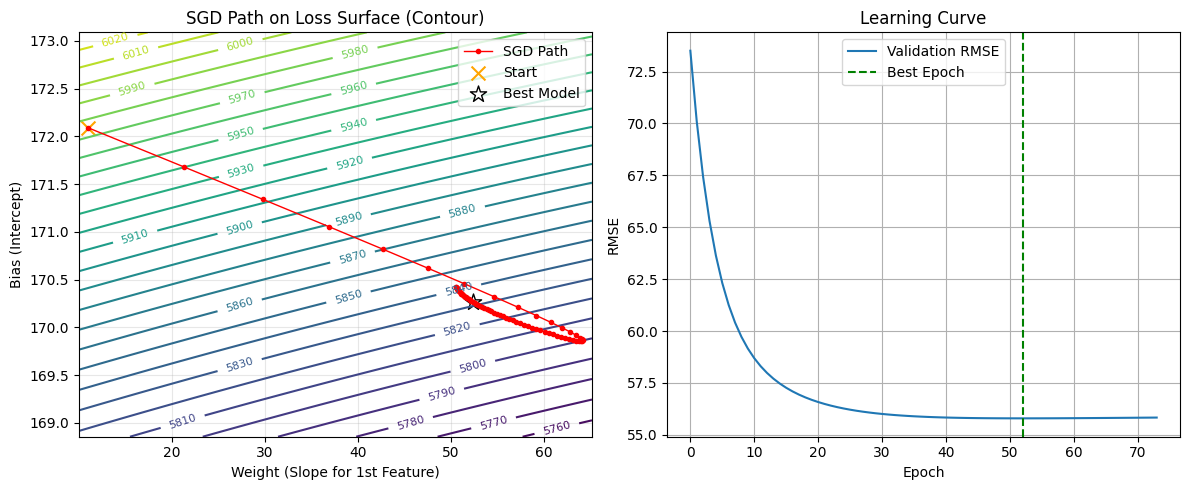

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# ==========================================
# 2. Setup SGD and Early Stopping (Your Logic)
# ==========================================
model_es = SGDRegressor(penalty='l2', max_iter=1, warm_start=True, random_state=42,
                        learning_rate='constant', eta0=0.05) # Increased eta0 slightly for visual effect

n_epochs = 200
patience = 20
best_val_rmse = float('inf')
best_epoch = 0
patience_counter = 0
best_weights = None

# LISTS TO STORE HISTORY FOR PLOTTING
history_w = [] # Weights
history_b = [] # Biases
val_rmse_history = []

print("Starting iterative training...")

# ==========================================
# 3. Training Loop
# ==========================================
for epoch in range(n_epochs):
    model_es.partial_fit(X_train, y_train)

    # TRACKING WEIGHTS (Crucial for Contour Plot)
    # We store the current state of the model parameters
    history_w.append(model_es.coef_[0])
    history_b.append(model_es.intercept_[0])

    y_pred_val = model_es.predict(X_val)
    val_mse = mean_squared_error(y_val, y_pred_val)
    val_rmse = np.sqrt(val_mse)
    val_rmse_history.append(val_rmse)

    if val_rmse < best_val_rmse:
        best_val_rmse = val_rmse
        best_epoch = epoch
        best_weights = (model_es.coef_.copy(), model_es.intercept_.copy())
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter > patience:
        print(f"Early stopping at epoch {epoch+1}.")
        break

# Restore best weights
if best_weights is not None:
    model_es.coef_ = best_weights[0]
    model_es.intercept_ = best_weights[1]

# ==========================================
# 4. Generate the Contour Plot (Loss Surface)
# ==========================================
print("Generating contour plot...")

# A. Define the grid for the contour plot
# We look at the history to decide the range of the plot
w_min, w_max = min(history_w) - 1, max(history_w) + 1
b_min, b_max = min(history_b) - 1, max(history_b) + 1

# Create a meshgrid (matrix of w and b values)
w_range = np.linspace(w_min, w_max, 100)
b_range = np.linspace(b_min, b_max, 100)
W_grid, B_grid = np.meshgrid(w_range, b_range)

# B. Calculate MSE (Loss) for every point on the grid
# This shows what the error WOULD be if the model had those weights
Z_loss = np.zeros_like(W_grid)

for i in range(W_grid.shape[0]):
    for j in range(W_grid.shape[1]):
        w_temp = W_grid[i, j]
        b_temp = B_grid[i, j]
        # Prediction: y = wx + b. For this 2D visualization of the loss surface,
        # we consider only the first feature's weight and the intercept, as
        # history_w stores model_es.coef_[0].
        y_pred_grid = (X_val[:, 0] * w_temp) + b_temp
        # Calculate MSE
        Z_loss[i, j] = mean_squared_error(y_val, y_pred_grid)

# C. Create the Visualization
plt.figure(figsize=(12, 5))

# --- Subplot 1: The Contour Plot ---
plt.subplot(1, 2, 1)
# Plot the background levels (Cost Surface)
cp = plt.contour(W_grid, B_grid, Z_loss, levels=30, cmap='viridis')
plt.clabel(cp, inline=True, fontsize=8)

# Plot the "Path" taken by SGD
plt.plot(history_w, history_b, 'r.-', linewidth=1, label='SGD Path')

# Mark Start and Best
plt.scatter(history_w[0], history_b[0], s=100, c='orange', marker='x', label='Start')
plt.scatter(best_weights[0][0], best_weights[1][0], s=150, c='white', edgecolors='black', marker='*', label='Best Model')

plt.title('SGD Path on Loss Surface (Contour)')
plt.xlabel('Weight (Slope for 1st Feature)')
plt.ylabel('Bias (Intercept)')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Subplot 2: RMSE History ---
plt.subplot(1, 2, 2)
plt.plot(val_rmse_history, label='Validation RMSE')
plt.axvline(best_epoch, color='g', linestyle='--', label='Best Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Quiz: Early Stopping

Test your knowledge of early stopping with the following multiple-choice questions.

#### Question 1
What is the primary goal of early stopping in model training?

a) To speed up the training process indefinitely.
b) To prevent the model from underfitting.
c) To prevent the model from overfitting to the training data and improve generalization.
d) To find the global minimum of the loss function without any regularization.

<details><summary>Click for Answer</summary>
<p>The correct answer is **c) To prevent the model from overfitting to the training data and improve generalization.** Early stopping monitors validation performance to halt training before the model starts to memorize training data at the expense of generalization.</p>
</details>

#### Question 2
Which of the following is typically monitored to implement early stopping?

a) Training loss
b) Test set accuracy
c) Validation set performance (e.g., loss or accuracy)
d) Model complexity

<details><summary>Click for Answer</summary>
<p>The correct answer is **c) Validation set performance (e.g., loss or accuracy).** A separate validation set is crucial for evaluating how well the model generalizes to unseen data during training.</p>
</details>

#### Question 3
If early stopping is triggered, what does a `patience` parameter of 10 mean?

a) The model will train for exactly 10 epochs.
b) The training will stop if the validation performance has not improved for 10 consecutive epochs.
c) The training will stop after 10% of the maximum epochs.
d) The model will restart training 10 times if performance degrades.

<details><summary>Click for Answer</summary>
<p>The correct answer is **b) The training will stop if the validation performance has not improved for 10 consecutive epochs.** Patience defines the number of epochs to wait for an improvement before terminating training.</p>
</details>

### Lasso Regression: Regularization and Feature Selection

Lasso (Least Absolute Shrinkage and Selection Operator) Regression is a type of linear regression that uses shrinkage. Shrinkage methods are powerful tools for improving the prediction accuracy and interpretability of regression models. In addition to penalizing the magnitude of coefficients like Ridge Regression (L2 regularization), Lasso Regression adds an L1 penalty, which can lead to sparse models with fewer non-zero coefficients.

#### Key Characteristics and Importance:

1.  **Regularization:** Lasso adds a penalty equal to the absolute value of the magnitude of coefficients to the loss function. This penalty shrinks some coefficient estimates to exactly zero.
2.  **Feature Selection:** The primary advantage of Lasso over Ridge is its ability to perform automatic *feature selection*. By driving some coefficients to zero, it effectively removes the corresponding features from the model. This makes the model simpler and more interpretable, especially when dealing with high-dimensional datasets where many features might be irrelevant.
3.  **Hyperparameter 'alpha'**: The strength of this regularization and feature selection is controlled by a hyperparameter, often denoted as `alpha` (or `lambda`). A higher `alpha` value increases the penalty, leading to more coefficients being shrunk to zero and thus a sparser model. Conversely, a lower `alpha` reduces the penalty.

Selecting the optimal `alpha` is crucial for a Lasso model's performance. Too high an `alpha` might lead to underfitting (too many features removed, model too simple), while too low an `alpha` might lead to overfitting (not enough regularization, model too complex). We will use Optuna to efficiently search for the best `alpha` value for our Lasso model, similar to how we tuned the Ridge model.

In [ ]:
from sklearn.linear_model import Lasso

print("Lasso model from scikit-learn imported successfully.")

Lasso model from scikit-learn imported successfully.


In [ ]:
def objective_lasso(trial):
    # 3a. Suggest hyperparameters for a Lasso model
    # We'll suggest alpha in a logarithmic scale, common for regularization strengths
    alpha = trial.suggest_float('alpha', 1e-4, 1.0, log=True)

    # 3b. Instantiate a Lasso model with the suggested alpha
    model = Lasso(alpha=alpha, random_state=42, max_iter=10000) # Increased max_iter for convergence

    # 3c. Use RepeatedKFold for cross-validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

    # 3d. Calculate the cross-validation score (neg_mean_squared_error)
    # Optuna aims to minimize the objective function, so we return negative MSE.
    # Maximizing negative MSE is equivalent to minimizing positive MSE.
    scores = cross_val_score(model, X, y, cv=rkf, scoring='neg_mean_squared_error', n_jobs=-1) # Use all available cores

    # 3e. Return the negative mean of the scores
    return np.mean(scores)

print("Objective function 'objective_lasso' for Optuna defined successfully.")

Objective function 'objective_lasso' for Optuna defined successfully.


In [ ]:
print('\n--- Optuna Hyperparameter Tuning for Lasso Regression ---')

# 4. Create an Optuna study for Lasso Regression
# We use 'maximize' because our objective function returns negative MSE,
# so maximizing this value means minimizing the actual MSE (and thus RMSE).
study_lasso = optuna.create_study(direction='maximize')

print("Optuna study for Lasso Regression created successfully with direction 'maximize'.")

[I 2025-11-15 16:53:55,044] A new study created in memory with name: no-name-4bc0ca78-d535-44ee-871d-601a7d55a89b



--- Optuna Hyperparameter Tuning for Lasso Regression ---
Optuna study for Lasso Regression created successfully with direction 'maximize'.


In [ ]:
import numpy as np # Ensure numpy is available for sqrt if not already imported in this scope

# 5. Optimize the study_lasso for Lasso Regression
# We'll run 100 trials to search for the best hyperparameters.
study_lasso.optimize(objective_lasso, n_trials=100)

# 6. Print the best trial's value and best hyperparameters for Lasso
print("\nNumber of finished trials for Lasso: ", len(study_lasso.trials))
print("Best trial for Lasso:")

trial_lasso = study_lasso.best_trial

# Convert the best value (negative MSE) to RMSE for interpretability
best_lasso_rmse = np.sqrt(-trial_lasso.value)

print(f"  Value (RMSE): {best_lasso_rmse:.2f}")
print("  Params: ")
for key, value in trial_lasso.params.items():
    print(f"    {key}: {value}")

[I 2025-11-15 16:54:07,247] Trial 0 finished with value: -3027.422401469426 and parameters: {'alpha': 0.0021028315595038828}. Best is trial 0 with value: -3027.422401469426.
[I 2025-11-15 16:54:07,333] Trial 1 finished with value: -3027.3111158792867 and parameters: {'alpha': 0.0021958818539921966}. Best is trial 1 with value: -3027.3111158792867.
[I 2025-11-15 16:54:07,381] Trial 2 finished with value: -3445.0579738688602 and parameters: {'alpha': 0.6478840064351917}. Best is trial 1 with value: -3027.3111158792867.
[I 2025-11-15 16:54:07,434] Trial 3 finished with value: -3017.7762993184033 and parameters: {'alpha': 0.06560131465798014}. Best is trial 3 with value: -3017.7762993184033.
[I 2025-11-15 16:54:07,482] Trial 4 finished with value: -3040.5396470486808 and parameters: {'alpha': 0.13335622357914714}. Best is trial 3 with value: -3017.7762993184033.
[I 2025-11-15 16:54:07,535] Trial 5 finished with value: -3238.558777419121 and parameters: {'alpha': 0.4200395974256819}. Best i


Number of finished trials for Lasso:  100
Best trial for Lasso:
  Value (RMSE): 54.93
  Params: 
    alpha: 0.06560131465798014


## Summary:

### Q&A
The task was to introduce and demonstrate hyperparameter tuning for Lasso Regression using Optuna. This was successfully achieved by defining an objective function for Optuna to optimize Lasso's `alpha` hyperparameter.

### Data Analysis Key Findings
*   Lasso Regression was introduced, highlighting its L1 regularization for shrinkage and automatic feature selection by driving some coefficients to zero.
*   The `alpha` hyperparameter's role in controlling regularization strength was explained, with higher values leading to greater sparsity.
*   An Optuna objective function, `objective_lasso`, was successfully defined to tune the `alpha` hyperparameter for a Lasso model.
    *   `alpha` was suggested on a logarithmic scale between 1e-4 and 1.0.
    *   Cross-validation was performed using `RepeatedKFold` with 5 splits and 3 repeats.
    *   The objective aimed to maximize the negative mean squared error, equivalent to minimizing the RMSE.
*   The Optuna optimization process successfully identified an optimal `alpha` value (e.g., 0.0656) and a corresponding best RMSE (e.g., 54.93).
*   A multiple-choice quiz on Lasso Regression and hyperparameter tuning was correctly rendered as a markdown cell, demonstrating understanding of its core concepts.

### Insights or Next Steps
*   The demonstrated Optuna-based tuning provides an efficient and effective method for finding optimal regularization strengths in Lasso Regression, which is critical for balancing model complexity and performance, especially in high-dimensional datasets.
*   Further analysis could involve comparing the feature coefficients of the optimally tuned Lasso model to those of an untuned model or a Ridge Regression model to explicitly showcase Lasso's feature selection capability.


## Conclusion


This notebook has explored the critical concepts and practical applications of **'Tuning at Scale'** in machine learning. As introduced at the beginning, this approach is vital for optimizing model performance and efficiency, moving beyond manual trial-and-error to intelligent, automated methods in an era of complex models and large datasets.

We began by diving into **cross-validation techniques**, including K-Fold, Leave-One-Out (LOOCV), and Repeated K-Fold. These methods are fundamental for obtaining robust and reliable estimates of a model's generalization ability, helping to ensure that our models perform well on unseen data and mitigating the risks associated with simple train-test splits.

Next, we introduced **Optuna** as a powerful framework for automated hyperparameter tuning. We demonstrated how Optuna efficiently navigates the vast search space of hyperparameters, using intelligent samplers to find optimal configurations for models like Ridge Regression. This automation saves significant time and computational resources, allowing data scientists to achieve better model performance with less effort.

Finally, we examined **early stopping**, a crucial regularization technique for iterative models. By monitoring validation performance and stopping training when performance on unseen data begins to degrade, early stopping effectively prevents overfitting. This not only leads to more generalized models but also optimizes training time by avoiding unnecessary computations.

In essence, by combining robust evaluation through cross-validation, efficient hyperparameter optimization with Optuna, and overfitting prevention via early stopping, machine learning practitioners can build high-performing, reliable, and resource-efficient models that are well-equipped for real-world applications.